In [48]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
from sklearn.metrics import mean_absolute_error


# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/federal-funds-effective-rate/FEDFUNDS.csv
/kaggle/input/gold-stock-prices/goldstock.csv


In [49]:
data = pd.read_csv("/kaggle/input/gold-stock-prices/goldstock.csv",
                    parse_dates = ["Date"])
data = data.set_index("Date").to_period('D').sort_index()
data
data_federal_funds_i_rate = pd.read_csv('/kaggle/input/federal-funds-effective-rate/FEDFUNDS.csv',
                                       parse_dates = ["DATE"])
data_federal_funds_i_rate  = data_federal_funds_i_rate.reset_index().set_index('DATE').to_period('D')
print(data.head())
print(data_federal_funds_i_rate.head())

            Unnamed: 0   Close   Volume    Open    High     Low
Date                                                           
2014-01-22        2532  1238.6  80262.0  1240.5  1243.5  1235.5
2014-01-23        2531  1262.5  41697.0  1235.1  1267.1  1230.8
2014-01-24        2530  1264.5  34998.0  1264.3  1273.2  1256.9
2014-01-27        2529  1263.5  63419.0  1269.9  1280.1  1252.0
2014-01-28        2528  1250.5  81426.0  1254.9  1261.9  1248.0
            index  FEDFUNDS
DATE                       
2014-01-01      0      0.07
2014-02-01      1      0.07
2014-03-01      2      0.08
2014-04-01      3      0.09
2014-05-01      4      0.09


In [50]:
window_roll = 6
data["Volume_roll"] = data["Volume"].rolling(window=window_roll,       
    center=False,      
    min_periods=window_roll,
).mean()  

<Axes: xlabel='Date'>

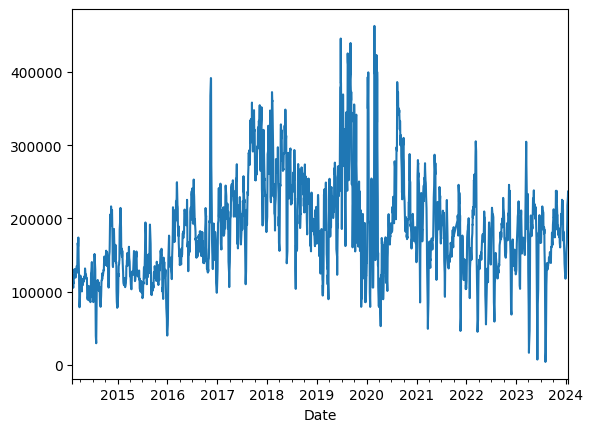

In [51]:
data.loc["2014-02-02":]["Volume_roll"].plot()

In [52]:
data.loc[:"2023-12-30"]["High"]

Date
2014-01-22    1243.5
2014-01-23    1267.1
2014-01-24    1273.2
2014-01-27    1280.1
2014-01-28    1261.9
               ...  
2023-12-22    2083.0
2023-12-26    2080.5
2023-12-27    2095.8
2023-12-28    2098.2
2023-12-29    2084.1
Freq: D, Name: High, Length: 2498, dtype: float64

<Axes: xlabel='DATE'>

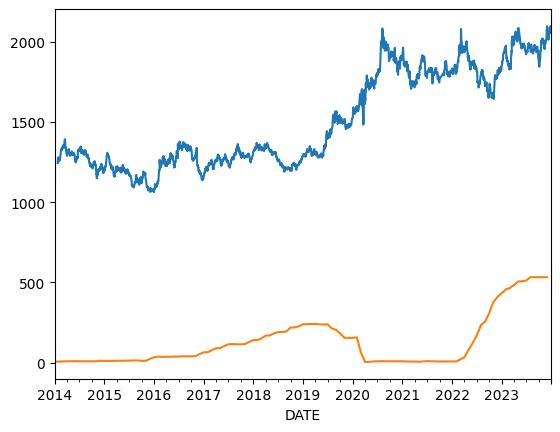

In [53]:
data.loc[:"2023-12-30"]["High"].plot()
(data_federal_funds_i_rate.loc[:"2023-12-30"]["FEDFUNDS"] * 100).plot()


<Axes: xlabel='Date'>

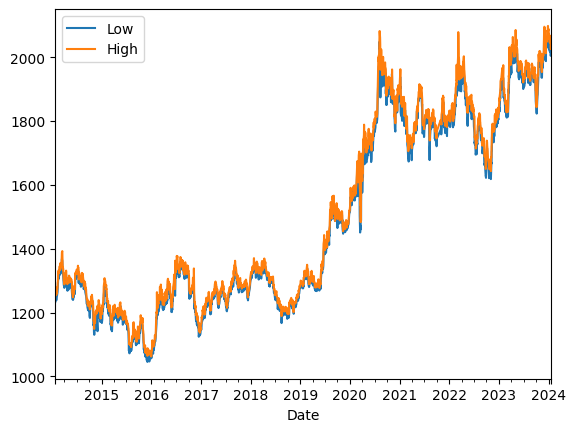

In [54]:
data[["Low","High"]].plot()

<Axes: xlabel='Date'>

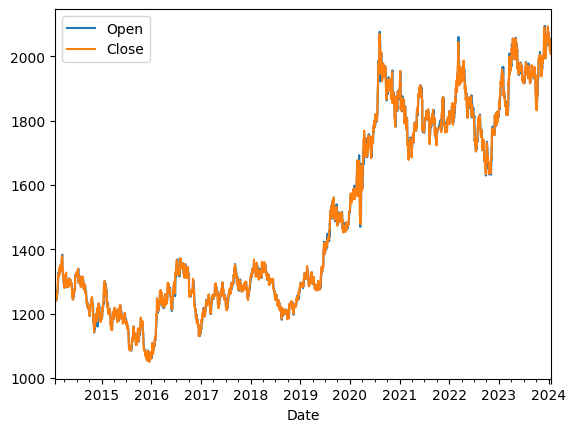

In [55]:
data[["Open","Close"]].plot()

<Axes: xlabel='Date'>

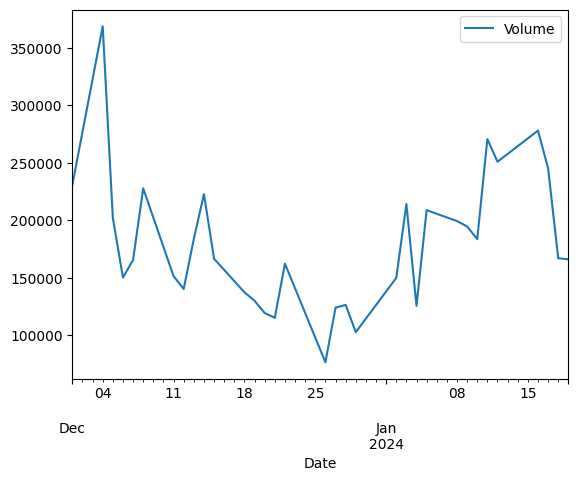

In [56]:
data.loc["2023-12-01":][["Volume"]].plot()

<Axes: xlabel='Date'>

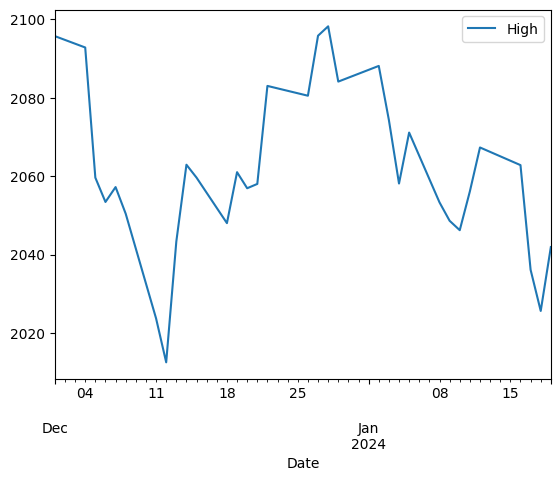

In [57]:
data.loc["2023-12-01":][["High"]].plot()

# Visualizing price behaviour

## Prices diference

In [58]:
prices_diference = np.abs(data.loc[:,"Low"] - data.loc[:,"High"])
print("Average prices diference" , prices_diference.mean())
print("Standard Deviation from the prices diference" , prices_diference.std())
print("Median from the prices variance" , prices_diference.median())

Average prices diference 19.5815213062525
Standard Deviation from the prices diference 12.539580404803424
Median from the prices variance 16.59999999999991


In [59]:
prices_diference_open_close = np.abs(data.loc[:,"Open"] - data.loc[:,"Close"])
print("Average prices diference on open and close" , prices_diference_open_close.mean())
print("Standard Deviation from the prices diference opening and closing" , prices_diference_open_close.std())
print("Median from the prices variance" , prices_diference_open_close.median())

Average prices diference on open and close 9.171405814416568
Standard Deviation from the prices diference opening and closing 9.79097451977089
Median from the prices variance 6.199999999999818


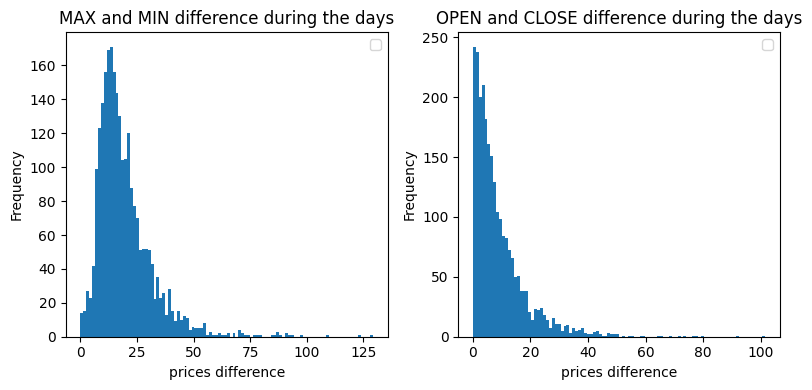

In [60]:
fig, axis = plt.subplots(1, 2, figsize=(8, 4))
axis[0].hist(prices_diference,bins = 100)
axis[0].set_title("MAX and MIN difference during the days")
axis[0].set_xlabel("prices difference")
axis[0].set_ylabel("Frequency")
axis[0].legend()

axis[1].hist(prices_diference_open_close,bins = 100)
axis[1].set_title("OPEN and CLOSE difference during the days")
axis[1].set_xlabel("prices difference")
axis[1].set_ylabel("Frequency")
axis[1].legend()
plt.tight_layout()

## Average Prices

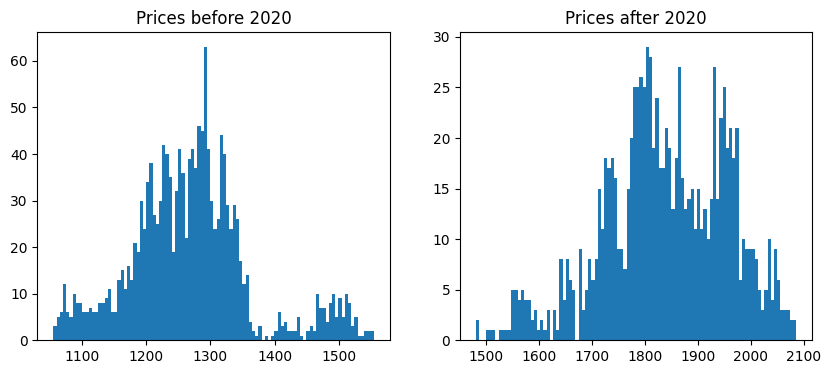

In [61]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
axs[0].hist(data.loc[:"2020-01-02"][["Low","High"]].mean(axis = 1),bins = 100)
axs[0].set_title('Prices before 2020')
axs[1].hist(data.loc["2020-01-02":][["Low","High"]].mean(axis = 1),bins = 100)
axs[1].set_title('Prices after 2020')
print("")

### *Verifiyng cicles*

In [62]:
dFPlot = pd.DataFrame()
dFPlot = data.loc["2023-01-01":"2023-12-20"]
#dFPlot["year"] = dFPlot.index.year
dFPlot["week_of_year"] = dFPlot.index.weekofyear
dFPlot["day_of_week"] = dFPlot.index.dayofweek
dFPlot["month"] = dFPlot.index.month
dFPlot["day"] = dFPlot.index.day
dFPlot["day_year"] = dFPlot.index.day_of_year


dFPlot.head()

/tmp/ipykernel_42/2408026487.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dFPlot["week_of_year"] = dFPlot.index.weekofyear
/tmp/ipykernel_42/2408026487.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dFPlot["day_of_week"] = dFPlot.index.dayofweek
/tmp/ipykernel_42/2408026487.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas

,Unnamed: 0,Close,Volume,Open,High,Low,Volume_roll,week_of_year,day_of_week,month,day,day_year
Date,,,,,,,,,,,,
2023-01-03,262,1846.1,206818.0,1831.8,1856.6,1831.3,130222.333333,1,1,1,3,3
2023-01-04,261,1859.0,193760.0,1845.2,1871.3,1842.0,145780.166667,1,2,1,4,4
2023-01-05,260,1840.6,177851.0,1861.2,1864.3,1829.9,149390.500000,1,3,1,5,5
2023-01-06,259,1869.7,208187.0,1835.9,1875.2,1835.2,165637.500000,1,4,1,6,6
2023-01-09,258,1877.8,183869.0,1872.8,1886.4,1869.3,179068.500000,2,0,1,9,9


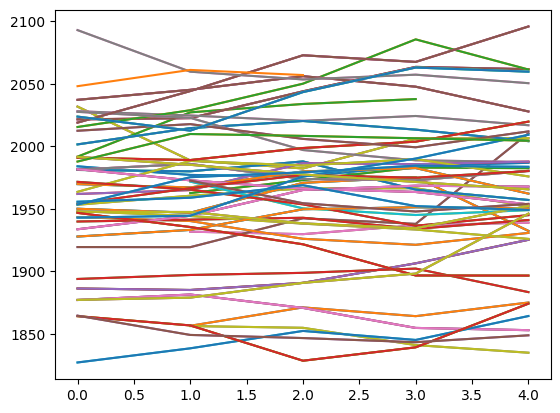

In [63]:
for i , week in enumerate(dFPlot["week_of_year"]):
    if(i % 2  == 0):
        subset = dFPlot.loc[dFPlot["week_of_year"] == week]
        plt.plot(subset["day_of_week"] , subset["High"])

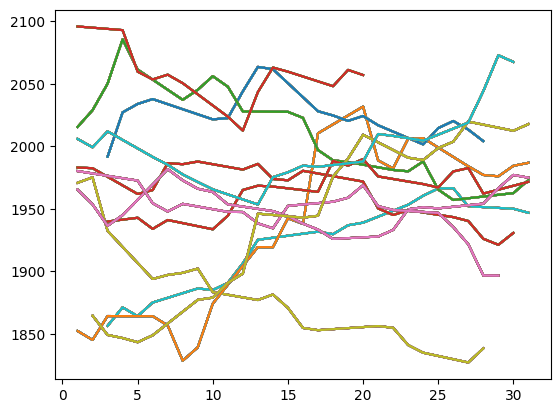

In [64]:
for i , month in enumerate(dFPlot["month"]):
    subset = dFPlot.loc[dFPlot["month"] == month]
    plt.plot(subset["day"] , subset["High"])

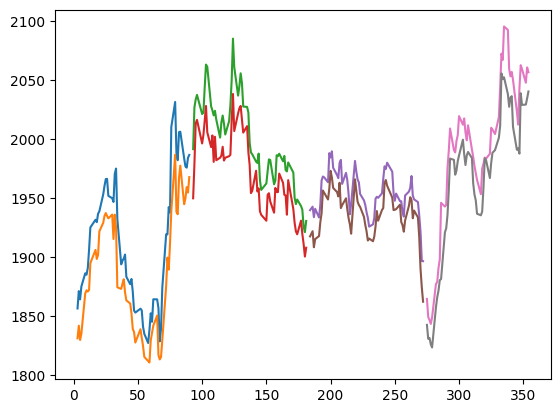

In [65]:
for i in range(3,13,3):
    subset = dFPlot.loc[(dFPlot["month"] <= i) & (dFPlot["month"] > i - 3)]
    plt.plot(subset["day_year"] , subset["High"])
    plt.plot(subset["day_year"] , subset["Low"])

# Forecasting with different methods

### The objective is forecast the max price of the gold in the next five days

In [66]:
from statsmodels.tsa.deterministic import CalendarFourier, DeterministicProcess
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [67]:
def standarlize_data(data,columns,original_values):

    for column in columns:
        std = data[column].std()
        mean = data[column].mean()
        original_values[column] = {}
        original_values[column]["std"] = std
        original_values[column]["mean"] = mean

        data[column] = (data[column] - mean) / std
    return data


In [68]:
forecast_origin = "2021-01-01"
dataForecast = data.loc[forecast_origin:]
dataForecast.head()

,Unnamed: 0,Close,Volume,Open,High,Low,Volume_roll
Date,,,,,,,
2021-01-04,765,1946.6,261675.0,1908.2,1948.7,1906.1,157639.333333
2021-01-05,764,1954.4,192111.0,1946.0,1957.0,1938.4,175083.666667
2021-01-06,763,1908.6,356182.0,1952.8,1962.5,1902.6,202023.166667
2021-01-07,762,1913.6,192365.0,1921.5,1929.6,1907.5,209766.500000
2021-01-08,761,1835.4,422485.0,1915.2,1918.4,1827.8,258732.666667


In [69]:
original_values = {}
# standarlize_data(dataForecast, ["Close" , "Open","High" ,"Low" ,"Volume"],original_values)

In [70]:
original_values

{}

In [71]:
import math
def create_multioutputs(data,n_out,output_column):
    for n in range(1, n_out + 1):
        data[f"out_{n}"] = data[output_column].shift(-n)
    return data

def create_multilags(data , n_lags,target_columns):
    columns_name = []
    for n in range(1, n_lags + 1):
        col_name = f"{target_columns}_lag_{n}"
        data[col_name] = data[target_columns].shift(n)
        columns_name.append(col_name)
    return (data , columns_name)

def variance_from_a_column(row , column_t, columns_list):
    sum_diferences = 0
    #print(row)
    value_t = row[column_t]
    for e in columns_list:
        sum_diferences += (value_t - row[e]) ** 2
    #print(sum_diferences)
    return math.sqrt(sum_diferences/len(columns_list))
        

In [72]:
fourier = CalendarFourier(freq = 'M', order = 10)
dp  = DeterministicProcess(
    order = 1,
    index = dataForecast.index,
    seasonal = True
   # ,additional_terms = [fourier]
)
dpData = dp.in_sample()
dpData.head()

,trend,"s(1,7)","s(2,7)","s(3,7)","s(4,7)","s(5,7)","s(6,7)","s(7,7)"
Date,,,,,,,,
2021-01-04,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-01-05,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2021-01-06,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2021-01-07,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2021-01-08,5.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [73]:
dpData["Open"] = dataForecast["Open"]
dpData["High"] = dataForecast["High"]
dpData["Volume"] = dataForecast["Volume"]
columns_t = list(dpData.columns)

In [74]:
dpData = create_multioutputs(dpData.copy(),4,"High")
dpData.dropna(inplace = True)
dpData , col_names = create_multilags(dpData.copy(),4,"Volume")
columns_t = columns_t + col_names
dpData.dropna(inplace = True)
dpData ,col_names= create_multilags(dpData.copy(),4,"High")
columns_t = columns_t + col_names
dpData.dropna(inplace = True)
dpData.head()

,trend,"s(1,7)","s(2,7)","s(3,7)","s(4,7)","s(5,7)","s(6,7)","s(7,7)",Open,High,...,out_3,out_4,Volume_lag_1,Volume_lag_2,Volume_lag_3,Volume_lag_4,High_lag_1,High_lag_2,High_lag_3,High_lag_4
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-14,9.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1845.6,1853.6,...,1875.6,1874.5,203544.0,225729.0,253190.0,422485.0,1859.3,1856.9,1856.0,1918.4
2021-01-15,10.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1847.3,1856.6,...,1874.5,1874.1,242126.0,203544.0,225729.0,253190.0,1853.6,1859.3,1856.9,1856.0
2021-01-19,11.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1828.8,1845.0,...,1874.1,1870.9,224725.0,242126.0,203544.0,225729.0,1856.6,1853.6,1859.3,1856.9
2021-01-20,12.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1843.2,1875.6,...,1870.9,1864.5,324829.0,224725.0,242126.0,203544.0,1845.0,1856.6,1853.6,1859.3
2021-01-21,13.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1875.6,1874.5,...,1864.5,1847.6,51238.0,324829.0,224725.0,242126.0,1875.6,1845.0,1856.6,1853.6


In [75]:
# dpData["std_dev"] = dpData[["out_1" ,"out_2" ,"out_3" ,"out_4"]].std(axis = 1)
dpData["deviation_from_high"] = dpData.apply(
    
    lambda dataP : variance_from_a_column(dataP,"High", ["out_1" ,"out_2" ,"out_3" ,"out_4"]),axis = 1)
dpData

,trend,"s(1,7)","s(2,7)","s(3,7)","s(4,7)","s(5,7)","s(6,7)","s(7,7)",Open,High,...,out_4,Volume_lag_1,Volume_lag_2,Volume_lag_3,Volume_lag_4,High_lag_1,High_lag_2,High_lag_3,High_lag_4,deviation_from_high
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-14,9.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1845.6,1853.6,...,1874.5,203544.0,225729.0,253190.0,422485.0,1859.3,1856.9,1856.0,1918.4,15.841165
2021-01-15,10.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1847.3,1856.6,...,1874.1,242126.0,203544.0,225729.0,253190.0,1853.6,1859.3,1856.9,1856.0,16.749776
2021-01-19,11.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1828.8,1845.0,...,1870.9,224725.0,242126.0,203544.0,225729.0,1856.6,1853.6,1859.3,1856.9,28.828068
2021-01-20,12.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1843.2,1875.6,...,1864.5,324829.0,224725.0,242126.0,203544.0,1845.0,1856.6,1853.6,1859.3,6.098360
2021-01-21,13.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1875.6,1874.5,...,1847.6,51238.0,324829.0,224725.0,242126.0,1875.6,1845.0,1856.6,1853.6,14.463143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-08,755.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2052.6,2053.3,...,2067.3,208861.0,125573.0,214132.0,149926.0,2071.1,2058.1,2074.3,2088.1,8.311739
2024-01-09,756.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2034.5,2048.6,...,2062.8,199325.0,208861.0,125573.0,214132.0,2053.3,2071.1,2058.1,2074.3,12.382851
2024-01-10,757.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2036.0,2046.2,...,2036.1,194610.0,199325.0,208861.0,125573.0,2048.6,2053.3,2071.1,2058.1,15.172261


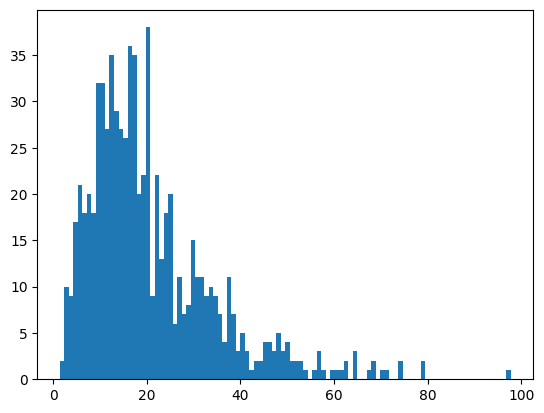

In [76]:
plt.hist(dpData["deviation_from_high"] , bins = 100)
plt.show()

In [77]:
model = LinearRegression()
model.fit(dpData[["trend","Open"]],dpData[["out_1","out_2","out_3", "out_4"]])
pred = model.predict(dpData[["trend","Open"]])
print(pred.shape)
dfPlot = pd.DataFrame()
dfPlot[["out_1","out_2","out_3", "out_4"]]= dpData[["out_1","out_2","out_3", "out_4"]]
dfPlot[["pred1","pred2","pred3","pred4"]] = pred
dfPlot

(751, 4)


,out_1,out_2,out_3,out_4,pred1,pred2,pred3,pred4
Date,,,,,,,,
2021-01-14,1856.6,1845.0,1875.6,1874.5,1852.346929,1850.121037,1848.098105,1845.682558
2021-01-15,1845.0,1875.6,1874.5,1874.1,1854.009191,1851.755534,1849.706364,1847.262086
2021-01-19,1875.6,1874.5,1874.1,1870.9,1836.102406,1834.236714,1832.552040,1830.512012
2021-01-20,1874.5,1874.1,1870.9,1864.5,1850.067980,1847.913148,1845.956577,1843.615597
2021-01-21,1874.1,1870.9,1864.5,1847.6,1881.471319,1878.656896,1876.080246,1873.052491
...,...,...,...,...,...,...,...,...
2024-01-08,2048.6,2046.2,2056.1,2067.3,2064.341507,2063.243016,2062.173672,2061.071158
2024-01-09,2046.2,2056.1,2067.3,2062.8,2046.822228,2046.103469,2045.390884,2044.684046
2024-01-10,2056.1,2067.3,2062.8,2036.1,2048.290737,2047.548330,2046.813375,2046.082093


<Axes: xlabel='Date'>

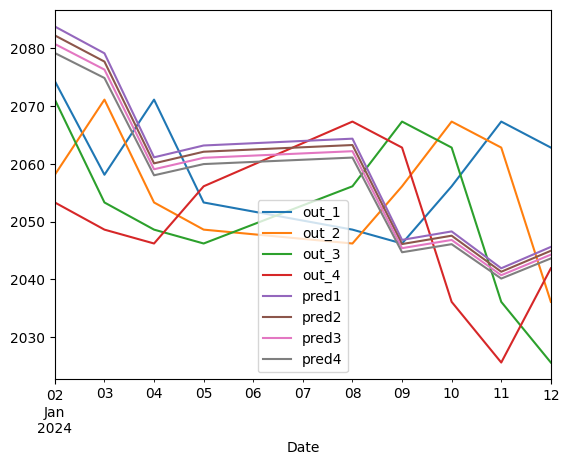

In [78]:
(dfPlot.loc["2024-01-01":][dfPlot.columns].plot())

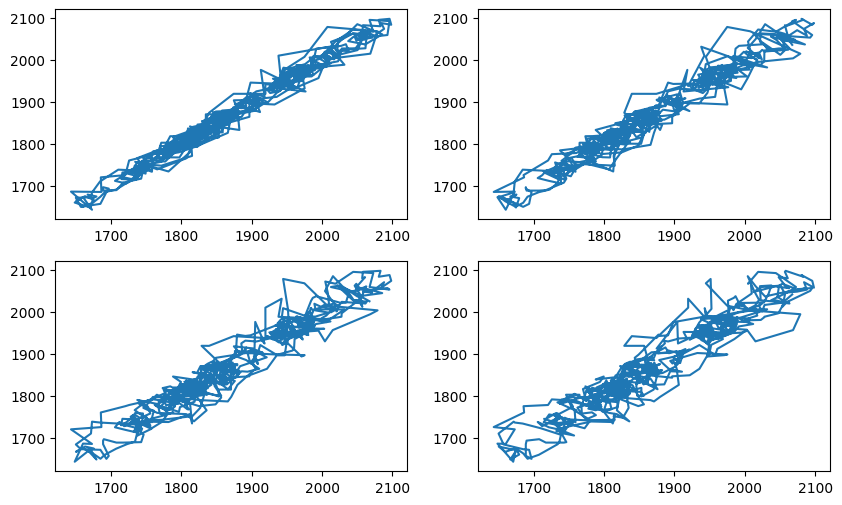

In [79]:

fig ,axs = plt.subplots(2,2,figsize = (10,6))
axs[0][0].plot(dpData['High'] , dpData["out_1"])
axs[0][1].plot(dpData['High'] , dpData["out_2"])
axs[1][0].plot(dpData['High'] , dpData["out_3"])
axs[1][1].plot(dpData['High'] , dpData["out_4"])

## Multioutput model

In [80]:
#columns_features = ["trend","s(1,7)" ,"s(2,7)" ,"s(3,7)" , 
 #                "s(4,7)","s(5,7)" ,"s(6,7)","s(7,7)","Open","High"]
columns_features = columns_t
# columns_features = columns_features + ["lag_1","lag_2","lag_3","lag_4",]
colums_output = ["out_1","out_2","out_3", "out_4"]
train_x , test_x , train_y , test_y = train_test_split(dpData[columns_features],dpData[colums_output]
                                                       ,shuffle=False,test_size = 0.25)
lmodel = LinearRegression()
print(train_x.shape , test_y.shape)

(563, 19) (188, 4)


In [81]:
columns_features

['trend',
 's(1,7)',
 's(2,7)',
 's(3,7)',
 's(4,7)',
 's(5,7)',
 's(6,7)',
 's(7,7)',
 'Open',
 'High',
 'Volume',
 'Volume_lag_1',
 'Volume_lag_2',
 'Volume_lag_3',
 'Volume_lag_4',
 'High_lag_1',
 'High_lag_2',
 'High_lag_3',
 'High_lag_4']

In [88]:
train_x

,trend,"s(1,7)","s(2,7)","s(3,7)","s(4,7)","s(5,7)","s(6,7)","s(7,7)",Open,High,Volume,Volume_lag_1,Volume_lag_2,Volume_lag_3,Volume_lag_4,High_lag_1,High_lag_2,High_lag_3,High_lag_4
Date,,,,,,,,,,,,,,,,,,,
2021-01-14,9.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1845.6,1853.6,242126.0,203544.0,225729.0,253190.0,422485.0,1859.3,1856.9,1856.0,1918.4
2021-01-15,10.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1847.3,1856.6,224725.0,242126.0,203544.0,225729.0,253190.0,1853.6,1859.3,1856.9,1856.0
2021-01-19,11.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1828.8,1845.0,324829.0,224725.0,242126.0,203544.0,225729.0,1856.6,1853.6,1859.3,1856.9
2021-01-20,12.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1843.2,1875.6,51238.0,324829.0,224725.0,242126.0,203544.0,1845.0,1856.6,1853.6,1859.3
2021-01-21,13.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1875.6,1874.5,47567.0,51238.0,324829.0,224725.0,242126.0,1875.6,1845.0,1856.6,1853.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-10,567.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2008.6,2021.5,133204.0,145401.0,525.0,811.0,737.0,2037.7,2033.8,2027.1,1991.7
2023-04-11,568.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2007.0,2022.5,122902.0,133204.0,145401.0,525.0,811.0,2021.5,2037.7,2033.8,2027.1
2023-04-12,569.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2019.1,2043.9,220798.0,122902.0,133204.0,145401.0,525.0,2022.5,2021.5,2037.7,2033.8


In [82]:
lmodel.fit(train_x ,train_y)

LinearRegression()

In [83]:
lmodel.coef_

array([[ 2.61799864e-03,  8.59645712e-01,  7.02810067e-01,
         8.29600479e-02,  2.19835784e-01, -4.66956751e-01,
         2.02364212e-01, -1.60065907e+00, -2.35950432e-01,
         1.22139003e+00, -5.21422072e-05,  3.81938791e-05,
        -1.16714673e-05,  4.69058193e-06,  1.48104990e-05,
        -1.66637495e-02, -3.78216510e-03,  1.09210382e-01,
        -9.47023290e-02],
       [ 1.00346122e-02,  9.37822759e-01,  6.47228185e-01,
        -2.32671739e-01,  3.23172683e-01, -5.23876375e-02,
        -1.28070745e+00, -3.42456798e-01, -1.83611515e-01,
         1.15771128e+00, -3.71988602e-05,  2.30920434e-05,
        -4.15308234e-06,  2.70371889e-05,  4.71141408e-06,
        -5.95941218e-02,  1.41662762e-01, -1.76593078e-02,
        -7.90242419e-02],
       [ 1.66152720e-02,  1.20758443e+00,  2.83842518e-01,
        -2.02346158e-03,  5.34233634e-01, -1.56070031e+00,
        -8.08355773e-02, -3.82101234e-01, -1.46842906e-01,
         1.08512106e+00, -4.40718458e-05,  3.22317487e-05,
    

In [89]:
train_pred = pd.DataFrame()
train_pred = pd.DataFrame(lmodel.predict(train_x)).join(train_y.reset_index())
train_pred_s = train_pred.loc[550:]

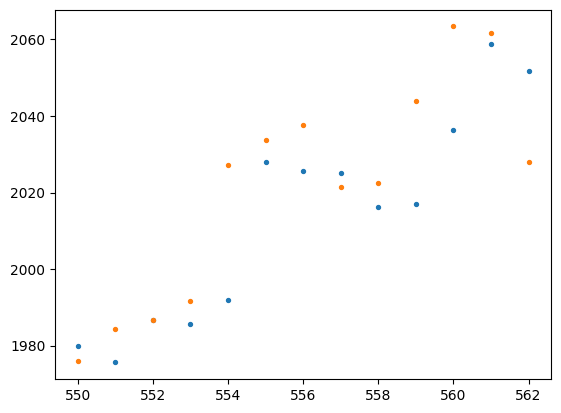

In [90]:
plt.scatter(train_pred_s.index, train_pred_s[1],s= 8)
plt.scatter(train_pred_s.index, train_pred_s["out_1"], s = 8)

In [86]:
"""fig, axis = plt.subplots(1, 2, figsize=(8, 4))
axis[0].plot(pd.DataFrame(lmodel.predict(test_x))[1],title = "Predction")
axis[0].plot(test_y.reset_index()["out_1"])"""
final_r = pd.DataFrame()
final_r= pd.DataFrame(lmodel.predict(test_x)).join(test_y.reset_index())

In [87]:
final_r.head()

,0,1,2,3,Date,out_1,out_2,out_3,out_4
0,2028.800276,2029.687718,2026.930091,2023.758892,2023-04-17,2024.6,2020.3,2024.2,2016.8
1,2025.798201,2023.540171,2021.433907,2019.181692,2023-04-18,2020.3,2024.2,2016.8,2001.5
2,2011.871488,2011.259849,2009.240246,2007.217030,2023-04-19,2024.2,2016.8,2001.5,2014.5
3,2023.872500,2020.954814,2018.933813,2019.835459,2023-04-20,2016.8,2001.5,2014.5,2020.2
4,2008.998130,2008.331678,2008.174234,2006.039313,2023-04-21,2001.5,2014.5,2020.2,2013.3


In [41]:
# fig,axis = plt.subplots(2,2,figsize = (10,6))

# axis[0][0].plot(final_r.index , final_r[0] , label = "Predicted")
# axis[0][0].plot(final_r.index , final_r["out_1"],label = "Real Value")
# axis[0][0].legend()


# axis[0][1].plot(final_r.index , final_r[1],label = "Predicted")
# axis[0][1].plot(final_r.index , final_r["out_2"],label = "Real Value")
# axis[0][1].legend()


# axis[1][0].plot(final_r.index , final_r[2],label = "Predicted")
# axis[1][0].plot(final_r.index , final_r["out_3"],label = "Real Value")
# axis[1][0].legend()

# axis[1][1].plot(final_r.index , final_r[3],label = "Predicted")
# axis[1][1].plot(final_r.index , final_r["out_4"],label = "Real Value")
# axis[1][1].legend()


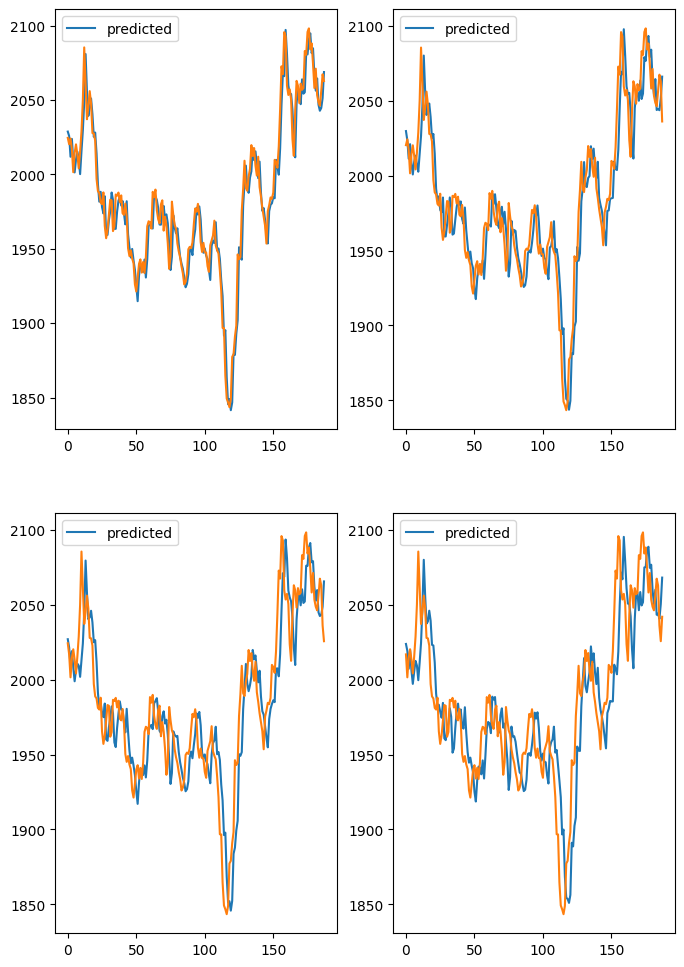

In [314]:
fig, axis = plt.subplots(2,2,figsize = (8,12))
axis[0][0].plot(final_r.index , (final_r[[0]].values * original_values["High"]["std"] + original_values["High"]["mean"]),label= "predicted")
axis[0][0].plot(final_r.index ,final_r[["out_1"]].values * original_values["High"]["std"] + original_values["High"]["mean"])
axis[0][0].legend()
axis[0][1].plot(final_r.index , (final_r[[1]].values * original_values["High"]["std"] + original_values["High"]["mean"]),label= "predicted")
axis[0][1].plot(final_r.index ,final_r[["out_2"]].values * original_values["High"]["std"] + original_values["High"]["mean"])
axis[0][1].legend()
axis[1][0].plot(final_r.index , (final_r[[2]].values * original_values["High"]["std"] + original_values["High"]["mean"]),label= "predicted")
axis[1][0].plot(final_r.index ,final_r[["out_3"]].values * original_values["High"]["std"] + original_values["High"]["mean"])
axis[1][0].legend()
axis[1][1].plot(final_r.index , (final_r[[3]].values * original_values["High"]["std"] + original_values["High"]["mean"]),label= "predicted")
axis[1][1].plot(final_r.index ,final_r[["out_4"]].values * original_values["High"]["std"] + original_values["High"]["mean"])
axis[1][1].legend()


In [91]:
print(f" day 1 " + str(mean_absolute_error(final_r[0], final_r["out_1"])))
print(f" day 2 " + str(mean_absolute_error(final_r[1], final_r["out_2"])))
print(f" day 3 " + str(mean_absolute_error(final_r[1], final_r["out_3"])))
print(f" day 4 " + str(mean_absolute_error(final_r[3], final_r["out_4"])))


 day 1 9.598535763972139
 day 2 15.272019340592907
 day 3 19.3243106537922
 day 4 22.462171822273888


In [315]:
print(f" day 1 " + str(mean_absolute_error(final_r[0]* original_values["High"]["std"] + original_values["High"]["mean"] , final_r["out_1"] * original_values["High"]["std"] + original_values["High"]["mean"])))
print(f" day 2 " + str(mean_absolute_error(final_r[1]* original_values["High"]["std"] + original_values["High"]["mean"] , final_r["out_2"] * original_values["High"]["std"] + original_values["High"]["mean"])))
print(f" day 3 " + str(mean_absolute_error(final_r[2]* original_values["High"]["std"] + original_values["High"]["mean"] , final_r["out_3"] * original_values["High"]["std"] + original_values["High"]["mean"])))
print(f" day 4 " + str(mean_absolute_error(final_r[3]* original_values["High"]["std"] + original_values["High"]["mean"] , final_r["out_4"] * original_values["High"]["std"] + original_values["High"]["mean"])))

 day 1 9.598535763965039
 day 2 15.272019340590024
 day 3 19.094380617020093
 day 4 22.462171822271703


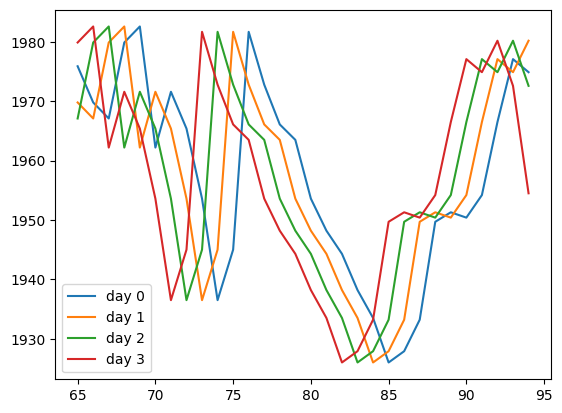

In [317]:
to_plot = final_r.iloc[65:95]
for day in range(4):
    plt.plot(to_plot.index , (to_plot[[f"out_{day + 1}"]].values * original_values["High"]["std"] + original_values["High"]["mean"]),label= f"day {day}")
    plt.legend()

In [ ]:
for day in range(4):
    plt.plot(final_r.index , (final_r[[day]].values * original_values["High"]["std"] + original_values["High"]["mean"]),label= f"day {day}")
    plt.legend()

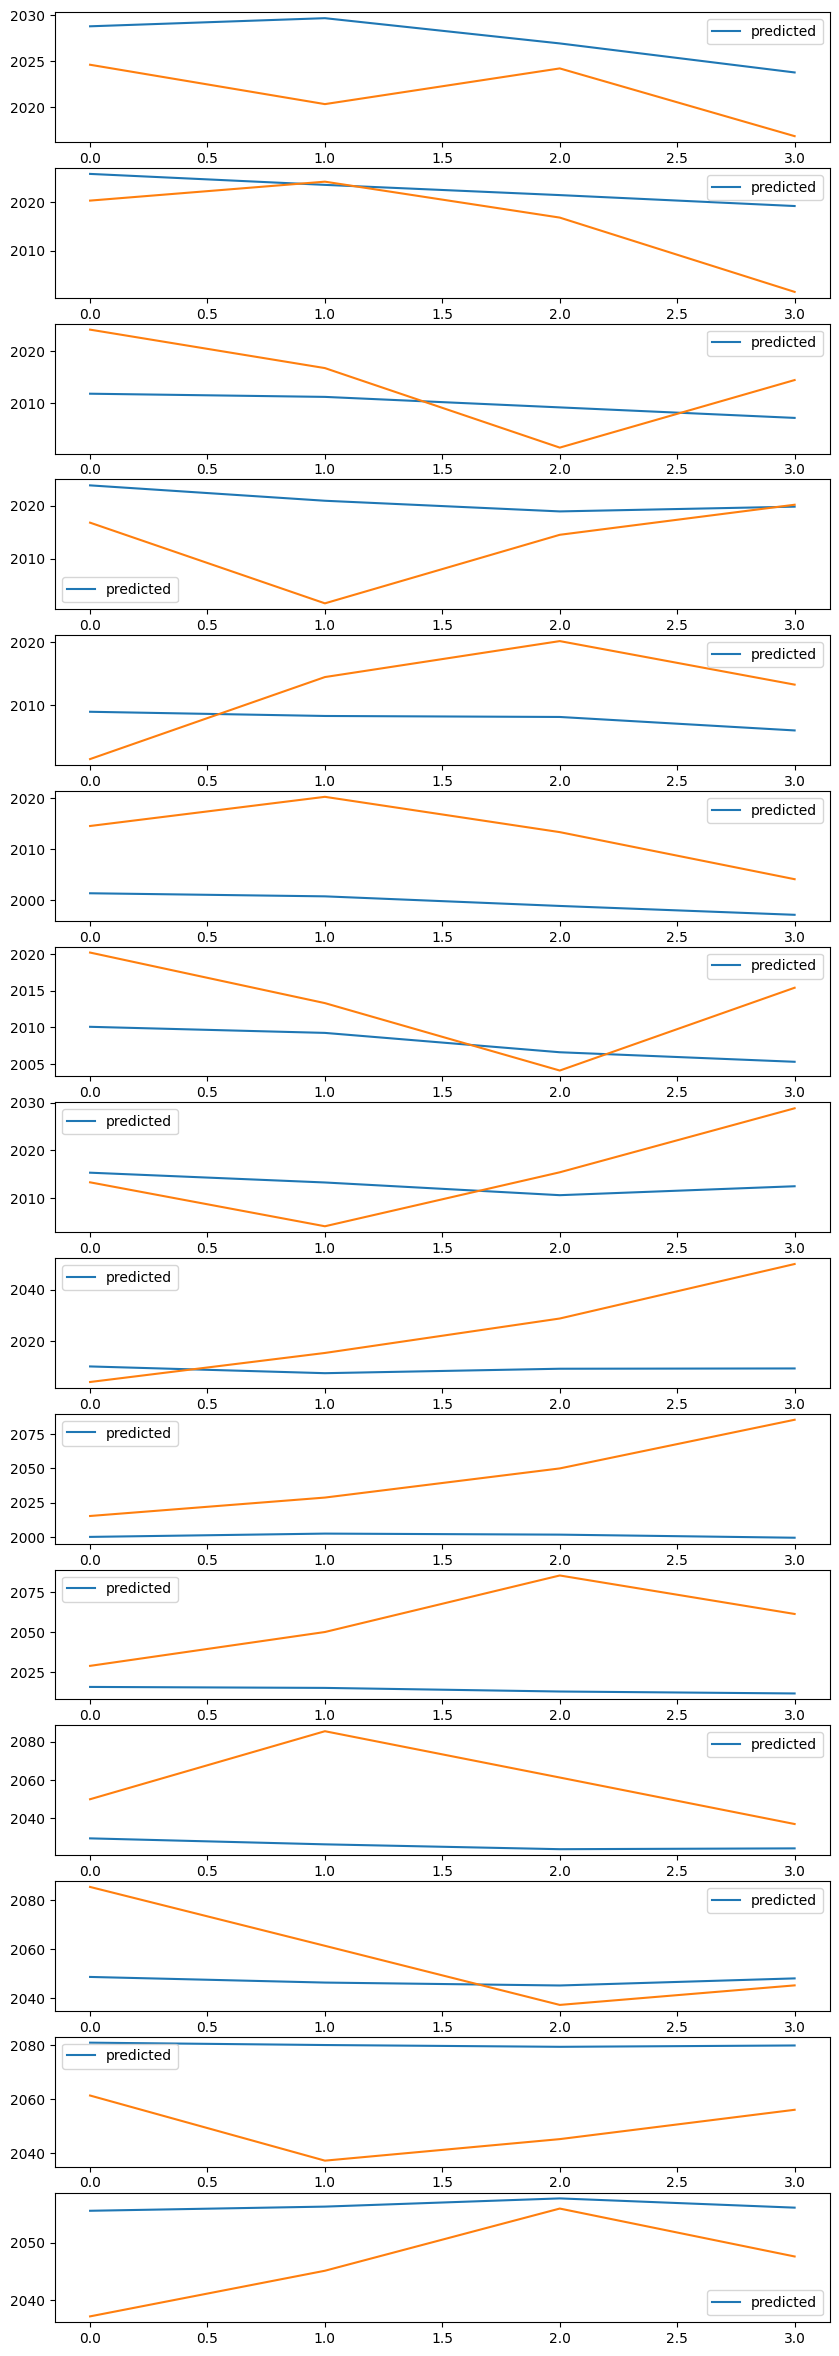

In [318]:
fig,axis = plt.subplots(15,1,figsize = (10,30))
for i in range(15):
    row = i
    axis[i].plot((final_r[[0,1,2,3]].iloc[row].values * original_values["High"]["std"] + original_values["High"]["mean"]),label= "predicted")
    axis[i].plot(final_r[["out_1","out_2","out_3","out_4"]].iloc[row].values * original_values["High"]["std"] + original_values["High"]["mean"])
    axis[i].legend()